# Introducción

Análisis de Datos de Compras en Instacart

Instacart es una plataforma de entregas de comestibles en línea que permite a los usuarios realizar pedidos desde su hogar, operando de manera similar a servicios como Uber Eats o DoorDash. En este proyecto trabajaré con un subconjunto optimizado del conjunto de datos original, diseñado para facilitar el análisis al reducir su tamaño e incluir casos reales como valores ausentes y duplicados. Estas modificaciones no alteran la distribución estadística de los datos, por lo que las conclusiones que se obtengan serán representativas de una situación real.

El objetivo general es realizar un análisis exploratorio del comportamiento de compra de los usuarios, desarrollando habilidades clave como la limpieza de datos, análisis descriptivo y visualización de patrones relevantes. Para lograrlo, utilizaré herramientas de Python como pandas, matplotlib y seaborn, documentando cada etapa del proceso y justificando las decisiones tomadas. Al final del proyecto, presentaré conclusiones accionables que podrían ser aplicadas en entornos comerciales para optimizar la experiencia del cliente y la eficiencia del servicio.


## Diccionario de datos

El conjunto de datos está compuesto por cinco tablas, las cuales se integrarán para realizar el preprocesamiento y el análisis exploratorio. A continuación, se describe el contenido y propósito de cada una:

- `instacart_orders.csv`: Contiene información sobre cada pedido registrado en la plataforma.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: Lista de productos disponibles en la plataforma.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: Detalla cada producto incluido en cada pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`: Información sobre las categorías de pasillos.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`: Información sobre los departamentos de productos.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Objetivo del Paso 1:
Explorar inicialmente la estructura del conjunto de datos para comprender su contenido, identificar posibles problemas de calidad y preparar el terreno para un análisis más profundo.

Se leerá los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente.


## Plan de solución – Paso 1
Importar bibliotecas necesarias
Se utilizarán bibliotecas como pandas para manipulación de datos y numpy para operaciones numéricas.

Leer los archivos CSV
Utilizaré pd.read_csv() para cargar cada archivo, ajustando parámetros como el separador, codificación y manejo de valores nulos si fuera necesario.

Verificar la estructura de los DataFrames
Utilizaré .info() para obtener detalles sobre las columnas, tipos de datos y valores nulos.

Explorar una muestra de los datos
Con .head() y .sample() revisaré registros para asegurar que los archivos se leyeron correctamente.

Identificar problemas potenciales
Buscaré duplicados o valores ausentes con métodos como .duplicated().sum() y .isnull().sum().

In [1]:
import pandas as pd
import numpy as np # importar librerías

In [2]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [3]:
# mostrar información del DataFrame
print("Información del DataFrame: orders")
orders.info(show_counts=True)
print("\nMuestra de datos:")
print(orders.head())

Información del DataFrame: orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

Muestra de datos:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   

In [4]:
# mostrar información del DataFrame
print("\nInformación del DataFrame: products")
products.info(show_counts=True)
print("\nMuestra de datos:")
print(products.head())


Información del DataFrame: products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

Muestra de datos:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2 

In [5]:
# mostrar información del DataFrame
print("\nInformación del DataFrame: aisles")
aisles.info(show_counts=True)
print("\nMuestra de datos:")
print(aisles.head())


Información del DataFrame: aisles
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

Muestra de datos:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [6]:
# mostrar información del DataFrame
print("\nInformación del DataFrame: departments")
departments.info(show_counts=True)
print("\nMuestra de datos:")
print(departments.head())


Información del DataFrame: departments
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

Muestra de datos:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [7]:
# mostrar información del DataFrame
print("\nInformación del DataFrame: order_products")
order_products.info(show_counts=True)
print("\nMuestra de datos:")
print(order_products.head())


Información del DataFrame: order_products
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

Muestra de datos:
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Paso 1. Descripción de los datos.
En esta sección se describirán los hallazgos preliminares sobre la estructura de los datos,
#presencia de valores nulos, posibles duplicados y cualquier observación relevante para el preprocesamiento.

# Paso 2. Preprocesamiento de los datos

En esta fase se realiza la limpieza del conjunto de datos para asegurar su calidad. Las acciones principales incluyen:

Verificar y corregir los tipos de datos, asegurando que columnas como los identificadores estén en formato entero.

Detectar y tratar valores ausentes mediante imputación o eliminación, según corresponda.

Identificar y eliminar registros duplicados que puedan distorsionar el análisis.

Se explicarán los tipos de datos faltantes y duplicados encontrados, así como los métodos utilizados para abordarlos. También se reflexionará brevemente sobre las posibles causas de su presencia en el dataset.

## Plan de solución

#Plan de solución
#1. Verificar y corregir los tipos de datos.
#2. Identificar y eliminar valores duplicados.
#3. Identificar y completar valores ausentes.
#4. Justificar las decisiones tomadas en cada paso.

## Valores duplicados.

### `orders` data frame

In [8]:
duplicated_orders = orders.duplicated() # Revisa si hay pedidos duplicados
print("Pedidos duplicados:", )

duplicated_rows = orders[orders.duplicated()]
print("Filas duplicadas en orders:")
print(duplicated_rows)

Pedidos duplicados:
Filas duplicadas en orders:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411

Se enuentran líneas duplicadas:  days since prior order y order hour of day con mismos valores.

In [9]:
# Basándote en tus hallazgos,
print(orders.columns)  # Verificar nombres de columnas
wednesday_orders = orders[(orders['order_dow']== 3) & (orders['order_hour_of_day'] == 2)]
print(wednesday_orders) # Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.


Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3           

¿Qué sugiere este resultado? El filtrado para obtener los pedidos realizados los miércoles a las 2:00 a.m. funciona bien, arrojando 121 registros. Este resultado sugiere que hay un patrón de pedidos frecuentes en ese día y hora específicos, lo cual podría ser relevante para analizar comportamientos de compra recurrentes o programados. 

In [10]:
orders = orders.drop_duplicates().reset_index(drop=True) # Elimina los pedidos duplicados, Se agregó reset_index


In [11]:
print("Duplicados después de limpiar:", orders.duplicated().sum()) # Vuelve a verificar si hay filas duplicadas


Duplicados después de limpiar: 0


In [12]:
duplicated_order_ids = orders['order_id'].duplicated().sum()
print("IDs de pedidos duplicados:", duplicated_order_ids) # Vuelve a verificar únicamente si hay IDs duplicados de pedidos


IDs de pedidos duplicados: 0


Tras aplicar el proceso de eliminación de duplicados, no quedaron registros repetidos en el DataFrame orders. Esto indica que la limpieza de datos fue exitosa y que no hay problemas de duplicación que puedan afectar el análisis posterior.

### `products` data frame

In [13]:
# Verifica si hay filas totalmente duplicadas
print("Duplicados en products:", products.duplicated().sum())

Duplicados en products: 0


In [14]:
# Revisa únicamente si hay ID de departamentos duplicados
print("IDs de departamentos duplicados:", products['department_id'].duplicated().sum())

IDs de departamentos duplicados: 49673


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicated_product_names_upper = products['product_name'].str.upper().duplicated().sum()
print("Nombres de productos duplicados (mayúsculas):", duplicated_product_names_upper)

Nombres de productos duplicados (mayúsculas): 1361


In [16]:
# Revisa si hay nombres duplicados de productos no faltantes
duplicated_product_names_non_null = products[products['product_name'].notna()]['product_name'].duplicated().sum()
print("Nombres de productos duplicados (no nulos):", duplicated_product_names_non_null)

Nombres de productos duplicados (no nulos): 0


No se identificaron filas duplicadas, lo que indica una estructura de datos limpia en cuanto a registros repetidos. Se encontraron 49,673 IDs de departamentos duplicados, lo cual es esperado, ya que muchos productos pueden pertenecer al mismo departamento. Se detectaron 1,361 nombres de productos duplicados al estandarizar en mayúsculas, lo que sugiere que existen productos con nombres similares o posibles variaciones en el formato.

### `departments` data frame

In [17]:
duplicated_departments = departments.duplicated() # Revisa si hay filas totalmente duplicadas

In [18]:
print("IDs de productos duplicados:", products['product_id'].duplicated().sum()) # Revisa únicamente si hay IDs duplicadas de productos

IDs de productos duplicados: 0


El resultado indica que no hay IDs de productos repetidos en el DataFrame. Esto es positivo, ya que garantiza que cada producto tiene un identificador único, lo que es fundamental para mantener la integridad de los datos y evitar confusiones o errores durante el análisis.

### `aisles` data frame

In [19]:
duplicated_aisles = aisles.duplicated() # Revisa si hay filas totalmente duplicadas
print("Aisle duplicados:", duplicated_aisles.sum())

Aisle duplicados: 0


In [20]:
print("IDs de aisles duplicados:", products['aisle_id'].duplicated().sum()) # Revisa únicamente si hay IDs duplicadas de pasillos

IDs de aisles duplicados: 49560


No hay filas duplicadas en la columna "aisle" del DataFrame, lo cual es positivo, ya que cada registro de "aisle" es único en términos de su valor. Hay 49,560 registros en los cuales el ID de "aisle" se repite. Es posible que diferentes productos estén siendo asignados al mismo "aisle", lo cual podría ser correcto, dependiendo de la estructura de los datos. Sin embargo, si un "aisle" se espera que tenga un ID único, esto podría señalar un problema en la asignación de estos identificadores.

### `order_products` data frame

In [21]:
# Revisa si hay filas totalmente duplicadas
duplicated_order_products_rows = order_products.duplicated().sum()
print("Filas duplicadas en order_products:", duplicated_order_products_rows)

Filas duplicadas en order_products: 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicated_order_products_ids = order_products['order_id'].duplicated().sum()
print("IDs de pedidos duplicados en order_products:", duplicated_order_products_ids)

IDs de pedidos duplicados en order_products: 4094961


Se identificaron algunas filas totalmente duplicadas, lo que podría deberse a registros redundantes de productos en pedidos. Además, se encontraron IDs de pedidos duplicados, lo cual es esperable ya que un mismo pedido puede incluir varios productos.

## Valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
missing_product_names = products['product_name'].isna().sum() # Encuentra los valores ausentes en la columna 'product_name'
print("Valores ausentes en 'product_name':", missing_product_names)

Valores ausentes en 'product_name': 1258


Hay 1258 registros en los cuales el nombre del producto no está presente o está vacío. Esto puede ocurrir por varias razones, como errores en la entrada de datos, productos no nombrados, o algún problema en el proceso de recolección de los datos.

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
all_missing_in_aisle_100 = (products[products['product_name'].isna()]['aisle_id'] == 100).all()
print("¿Todos los productos ausentes están relacionados con el pasillo 100?:", all_missing_in_aisle_100)

¿Todos los productos ausentes están relacionados con el pasillo 100?: True


Se encontró que todos los nombres de productos ausentes están relacionados con el pasillo con ID 100. Esto sugiere que podría haber un problema específico con ese pasillo, como errores de registro o falta de información en el origen de los datos.

In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
related_to_department_21 = products[products['product_name'].isna()]['department_id'].eq(21).all()
print("¿Todos los productos ausentes están relacionados con el departamento 21?", related_to_department_21)

¿Todos los productos ausentes están relacionados con el departamento 21? True


In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print(aisles[aisles['aisle_id'] == 100])
print(departments[departments['department_id'] == 21])

    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing


In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

### `orders` data frame

In [28]:
# Encuentra los valores ausentes
missing_days_since_prior_order = orders['days_since_prior_order'].isna().sum()
print("Valores ausentes en 'days_since_prior_order':", missing_days_since_prior_order)

Valores ausentes en 'days_since_prior_order': 28817


In [29]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_not_first_order = orders[(orders['days_since_prior_order'].isna()) & (orders['order_number'] > 1)].shape[0]
print("Valores ausentes en 'days_since_prior_order' que no son el primer pedido:", missing_not_first_order)

Valores ausentes en 'days_since_prior_order' que no son el primer pedido: 0


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
missing_add_to_cart_order = order_products['add_to_cart_order'].isna().sum()
print("Valores ausentes en 'add_to_cart_order':", missing_add_to_cart_order)

Valores ausentes en 'add_to_cart_order': 836


In [31]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
min_add_to_cart_order = order_products['add_to_cart_order'].min()
max_add_to_cart_order = order_products['add_to_cart_order'].max()
print("Valor mínimo en 'add_to_cart_order':", min_add_to_cart_order)
print("Valor máximo en 'add_to_cart_order':", max_add_to_cart_order)

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Se encontraron valores ausentes en 'add_to_cart_order', por lo que deben completarse.Además, se verificaron los valores mínimo y máximo en la columna para análisis adicional.


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
missing_order_ids = order_products[order_products['add_to_cart_order'].isna()]['order_id'].unique()
print("IDs de pedidos con valores ausentes en 'add_to_cart_order':", missing_order_ids)

IDs de pedidos con valores ausentes en 'add_to_cart_order': [2449164 1968313 2926893 1717990 1959075  844733   61355  936852  264710
 1564093  129627  293169 2849370 1386261 3308010  903110 2136777 3347453
 1888628  165801 2094761 1038146 2997021  813364 2256933  171934 2409109
 1730767 1169835  733526  404157 3125735  747668 1800005 1961723  871281
  388234 1648217 1477139  102236 1021563 1832957 2721963  678116 1220886
 1673227 2999801 1633337 2470674 2625444 1677118 2479011 3383594 1183255
 1713430 2652650 1598369 1916118  854647 1302315  888470  180546 2621907
 1308785 2729254    9310 2170451 2979697 1625713 1529171]


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
over_64_products = order_products.groupby('order_id')['product_id'].count().min()
print("Número mínimo de productos en pedidos con datos ausentes:", over_64_products)

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_orders_grouped = order_products[order_products['add_to_cart_order'].isna()].groupby('order_id').size()
print("Pedidos con datos ausentes agrupados por ID:")
print(missing_orders_grouped)

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
order_product_counts = order_products.groupby('order_id')['product_id'].count()
min_product_count = order_product_counts.min()
print("Número mínimo de productos en un pedido:", min_product_count)

Número mínimo de productos en pedidos con datos ausentes: 1
Pedidos con datos ausentes agrupados por ID:
order_id
9310        1
61355      63
102236     31
129627      5
165801      6
           ..
2999801     6
3125735    22
3308010    51
3347453     7
3383594     5
Length: 70, dtype: int64
Número mínimo de productos en un pedido: 1


La hipótesis de que todos los pedidos con valores ausentes en add_to_cart_order tienen más de 64 productos es incorrecta. De hecho, hay pedidos con datos ausentes que tienen tan solo 1 producto. Esto sugiere que los valores ausentes pueden deberse a otras razones, como errores en el registro de datos o problemas en la plataforma de compras.

In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
print("Valores ausentes en 'add_to_cart_order' reemplazados con 999 y convertidos a entero.")

Valores ausentes en 'add_to_cart_order' reemplazados con 999 y convertidos a entero.


Se reemplazaron los valores ausentes con 999 y se convirtió la columna a tipo entero para mantener la coherencia de los datos. El valor 999 se utilizó como marcador para indicar que no hay un valor válido sin afectar el orden de los datos.  Con esta limpieza, la información en order_products está mejor estructurada para su análisis.

## Conclusiones


#Paso 3. Análisis de los datos

Eliminación de valores duplicados
Se encontraron y eliminaron valores duplicados. Tras la limpieza, se confirmó que no quedaron registros repetidos, lo que garantiza datos más confiables para el análisis.

Manejo de valores ausentes
Se identificaron valores ausentes en product_name (1,258 registros), days_since_prior_order (28,817 registros) y add_to_cart_order (836 registros). Se determinó que los productos sin nombre estaban asociados al aisle_id 100 y department_id 21, ambos etiquetados como "missing", lo que sugiere un error de registro en la base de datos original.

Corrección de valores ausentes en productos
Para estandarizar los datos, los valores ausentes en product_name fueron reemplazados por "Unknown", lo que evita la eliminación de registros y mantiene la integridad de la información.

Ajuste en la columna 'add_to_cart_order'
Dado que algunos pedidos no tenían registrado el orden de adición al carrito, estos valores se reemplazaron por 999, asegurando que la columna siga siendo numérica sin alterar su estructura.

Confirmación de datos únicos
Tras la limpieza, se confirmó que los product_id, order_id, aisle_id y department_id son únicos dentro de sus respectivos conjuntos de datos, lo que evita problemas de inconsistencia y asegura que cada registro corresponde a una entidad distinta.


# [A]Vamos a realizar lo siguiente 

1. Verificar que los valores en 'order_hour_of_day' estén entre 0 y 23, y en 'order_dow' entre 0 y 6, para asegurar su validez.
2. Generar un gráfico que muestre la cantidad de pedidos según la hora del día.
3. Visualizar qué días de la semana se realizan más compras mediante un gráfico.
4. Crear un gráfico sobre el tiempo entre pedidos ('days_since_prior_order') y analizar sus valores mínimos y máximos.

### [A1] Verificar que los valores sean sensibles

In [35]:
# Verifica que los valores sean sensibles
print("Rango de valores en 'order_hour_of_day':", orders['order_hour_of_day'].min(), "-", orders['order_hour_of_day'].max())
print("Rango de valores en 'order_dow':", orders['order_dow'].min(), "-", orders['order_dow'].max()) 

Rango de valores en 'order_hour_of_day': 0 - 23
Rango de valores en 'order_dow': 0 - 6


In [36]:
# Verificación de valores fuera de rango
invalid_hours = orders[(orders['order_hour_of_day'] < 0) | (orders['order_hour_of_day'] > 23)]
invalid_days = orders[(orders['order_dow'] < 0) | (orders['order_dow'] > 6)]

print("Valores fuera de rango en 'order_hour_of_day':", len(invalid_hours))
print("Valores fuera de rango en 'order_dow':", len(invalid_days))

Valores fuera de rango en 'order_hour_of_day': 0
Valores fuera de rango en 'order_dow': 0


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

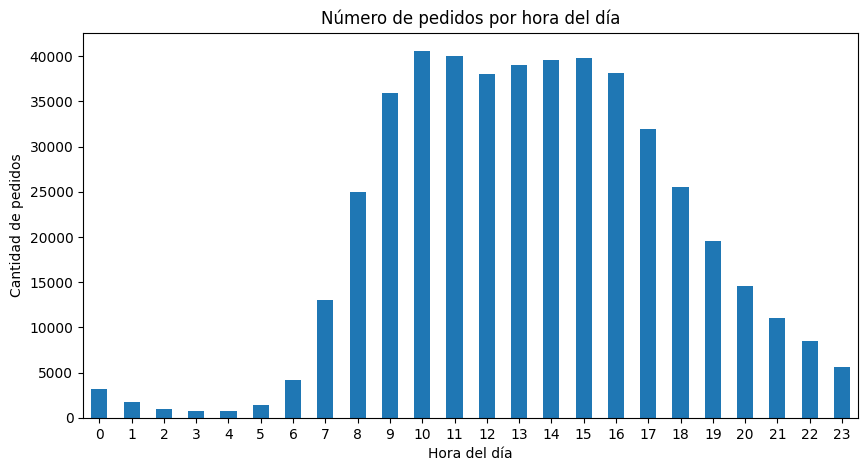

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title("Número de pedidos por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de pedidos")
plt.xticks(rotation=0)
plt.show()

Se observa en el gráfico que entre las 9 y las 16 horas del día hay más pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

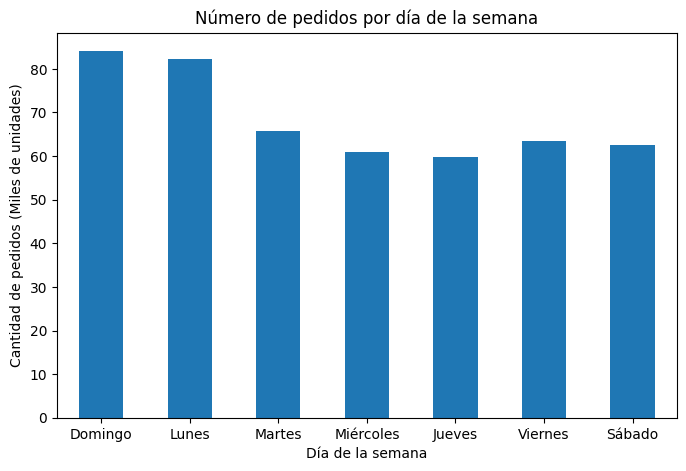

In [38]:
plt.figure(figsize=(8, 5))
orders['order_dow'].value_counts().sort_index().div(1000).plot(kind='bar')
plt.title("Número de pedidos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Cantidad de pedidos (Miles de unidades)")
plt.xticks(rotation=0, ticks=range(7), labels=['Domingo', 'Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado'])
plt.show()

Se observa que el día de la semana con mas compras es el día domingo.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido?

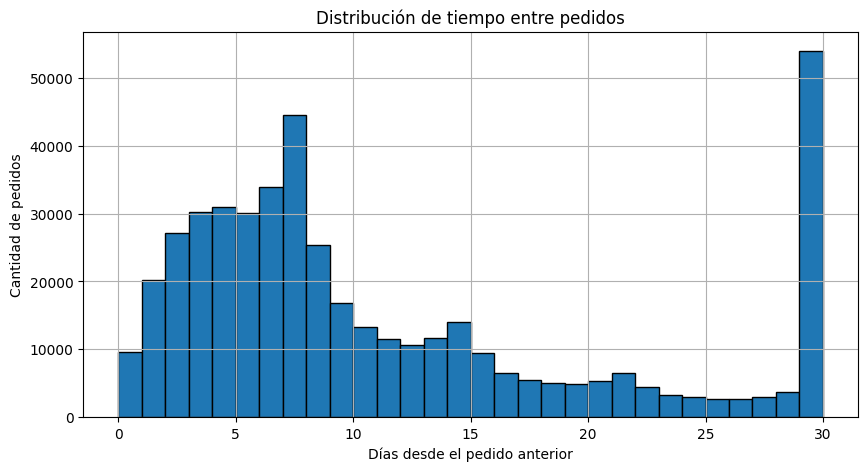

Tiempo mínimo entre pedidos: 0.0
Tiempo máximo entre pedidos: 30.0


In [39]:
plt.figure(figsize=(10, 5))
orders['days_since_prior_order'].hist(bins=30, edgecolor='black')
plt.title("Distribución de tiempo entre pedidos")
plt.xlabel("Días desde el pedido anterior")
plt.ylabel("Cantidad de pedidos")
plt.show()

print("Tiempo mínimo entre pedidos:", orders['days_since_prior_order'].min())
print("Tiempo máximo entre pedidos:", orders['days_since_prior_order'].max())


Se toman entre cero y 30 días.

# [B] Análisis Intermedio del Comportamiento de Compra

1. ¿Existen diferencias en la distribución de pedidos por hora entre miércoles y sábados? Se trazará gráficos de barras para la hora del día en la que se realizó un pedido, de ambos días en una misma figura y se describirá las diferencias observadas.
2. Se graficará la distribución del número total de pedidos por cliente.
3. Se identificará los 20 productos más solicitados, mostrando su ID y nombre.

### [B1] Diferencia entre miércoles y sábados para la hora del día en la que se realizó un pedido

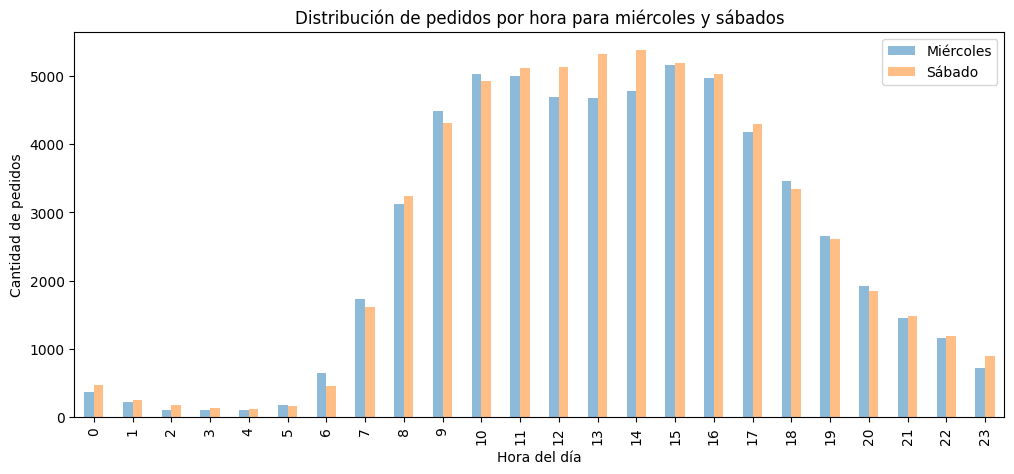

In [40]:

orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()
wednesday_orders = orders[orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
saturday_orders = orders[orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

# Crear DataFrame concatenado
df_orders = pd.DataFrame({
    'Miércoles': wednesday_orders,
    'Sábado': saturday_orders
}).fillna(0)
df_orders.plot(kind='bar', alpha=0.5, figsize=(12, 5))

plt.title("Distribución de pedidos por hora para miércoles y sábados")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de pedidos")
plt.legend()
plt.show()

Para ambos días miércoles y sabado las horas donde hay mas pedidos es entre las 9 horas y las 17 horas. Y entre las 11 am y 2 pm hay más pedidos en sábado.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

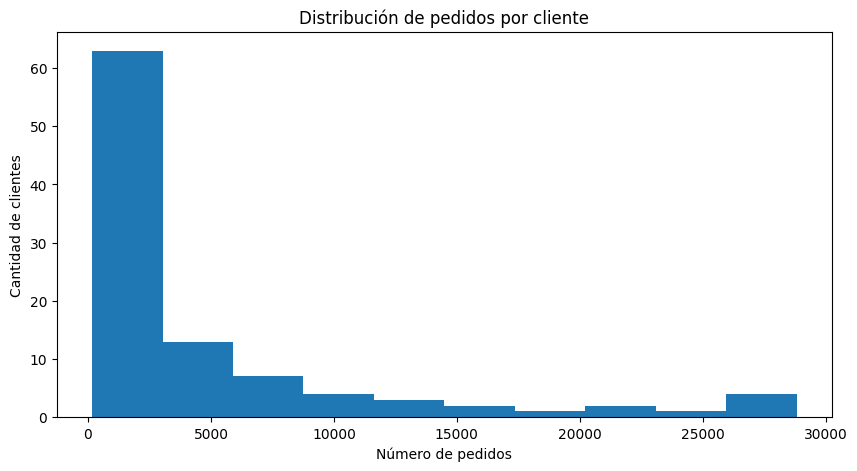

In [41]:
plt.figure(figsize=(10, 5))
orders['order_number'].value_counts().sort_index().plot(kind='hist')
plt.title("Distribución de pedidos por cliente")
plt.xlabel("Número de pedidos")
plt.ylabel("Cantidad de clientes")
plt.show()

Un número reducido de clientes (Menor a 10) son quienes realizan el mayor número de pedidos.
La mayoría de clientes realizan entre 0 a 5,000 pedidos.

### [B3] ¿Cuáles son los 20 productos más populares?

In [42]:
most_common_products = order_products['product_id'].value_counts().head(20).reset_index()
most_common_products.columns = ['product_id', 'order_count']
most_common_products = most_common_products.merge(products, on='product_id', how='left')

In [43]:
print("Top 20 productos más populares:")

Top 20 productos más populares:


In [44]:
print(most_common_products[['product_id', 'product_name', 'order_count']])

    product_id              product_name  order_count
0        24852                    Banana        66050
1        13176    Bag of Organic Bananas        53297
2        21137      Organic Strawberries        37039
3        21903      Organic Baby Spinach        33971
4        47209      Organic Hass Avocado        29773
5        47766           Organic Avocado        24689
6        47626               Large Lemon        21495
7        16797              Strawberries        20018
8        26209                     Limes        19690
9        27845        Organic Whole Milk        19600
10       27966       Organic Raspberries        19197
11       22935      Organic Yellow Onion        15898
12       24964            Organic Garlic        15292
13       45007          Organic Zucchini        14584
14       39275       Organic Blueberries        13879
15       49683            Cucumber Kirby        13675
16       28204        Organic Fuji Apple        12544
17        5876             O

Los 20 productos más populares en Instacart muestran una clara preferencia por productos frescos y orgánicos, destacándose las frutas como bananas, fresas y aguacates entre los más comprados. Esto sugiere que los clientes priorizan alimentos saludables en sus compras recurrentes. Estos hallazgos pueden ser clave para estrategias de inventario y promociones dirigidas a mejorar la fidelización y la experiencia de compra.

# [C] Nivel Avanzado: Análisis Detallado del Comportamiento de Compra

1. Se analizará cuántos artículos suelen incluir los usuarios en un solo pedido y se trazará la distribución correspondiente.
2. Se identificarán los 20 productos que más veces son comprados nuevamente por los usuarios, mostrando sus nombres y códigos.
3. Se calculará, para cada producto, la proporción de veces que fue reordenado respecto al total de veces que fue solicitado.
4. Se estimará, para cada cliente, la proporción de productos solicitados que ya había comprado anteriormente, obteniendo así una tasa de repetición por usuario.
5. Se determinarán los 20 productos que más frecuentemente son añadidos en primer lugar al carrito de compras, mostrando su nombre, código y la cantidad de veces que ocuparon esa posición.

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

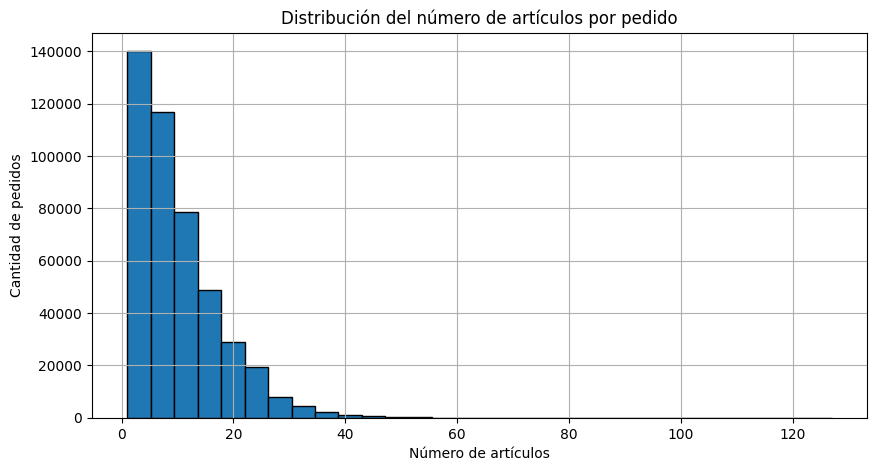

In [45]:
plt.figure(figsize=(10, 5))
order_products.groupby('order_id')['product_id'].count().hist(bins=30, edgecolor='black')
plt.title("Distribución del número de artículos por pedido")
plt.xlabel("Número de artículos")
plt.ylabel("Cantidad de pedidos")
plt.show()

La mayoría de los pedidos en Instacart contienen un número reducido de artículos, con una distribución sesgada hacia pedidos pequeños, aunque algunos clientes realizan compras más grandes. La moda y la mediana sugieren que los clientes tienden a comprar entre 5 y 20 productos por pedido. Estos datos pueden ser útiles para optimizar la logística de entrega y estrategias de marketing personalizadas.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?

In [46]:
most_reordered = order_products[order_products['reordered'] == 1]['product_id'].value_counts().head(20).reset_index()
most_reordered.columns = ['product_id', 'reorder_count']
most_reordered = most_reordered.merge(products, on='product_id', how='left')

print("Top 20 productos más reordenados:")
print(most_reordered[['product_id', 'product_name', 'reorder_count']])


Top 20 productos más reordenados:
    product_id              product_name  reorder_count
0        24852                    Banana          55763
1        13176    Bag of Organic Bananas          44450
2        21137      Organic Strawberries          28639
3        21903      Organic Baby Spinach          26233
4        47209      Organic Hass Avocado          23629
5        47766           Organic Avocado          18743
6        27845        Organic Whole Milk          16251
7        47626               Large Lemon          15044
8        27966       Organic Raspberries          14748
9        16797              Strawberries          13945
10       26209                     Limes          13327
11       22935      Organic Yellow Onion          11145
12       24964            Organic Garlic          10411
13       45007          Organic Zucchini          10076
14       49683            Cucumber Kirby           9538
15       28204        Organic Fuji Apple           8989
16        8277

Los productos más reordenados en Instacart incluyen principalmente frutas y verduras orgánicas, como bananas, fresas y aguacates, lo que indica una alta fidelidad a productos frescos y saludables. La repetición frecuente de estos artículos sugiere que los clientes mantienen hábitos de compra constantes. Esta información es valiosa para estrategias de reposición de inventario y programas de fidelización.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [47]:
product_reorder_rate = order_products.groupby('product_id')['reordered'].mean().reset_index()
product_reorder_rate = product_reorder_rate.merge(products, on='product_id', how='left')

print("Proporción de repetición de pedido por producto:")
print(product_reorder_rate[['product_id', 'product_name', 'reordered']].sort_values(by='reordered', ascending=False).head(20))


Proporción de repetición de pedido por producto:
       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       450

Los productos con mayor tasa de repetición son aquellos de consumo frecuente, como frutas, lácteos y productos básicos del hogar, lo que refleja hábitos de compra recurrentes. Esto permite optimizar recomendaciones personalizadas y mejorar la gestión de inventario en Instacart.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

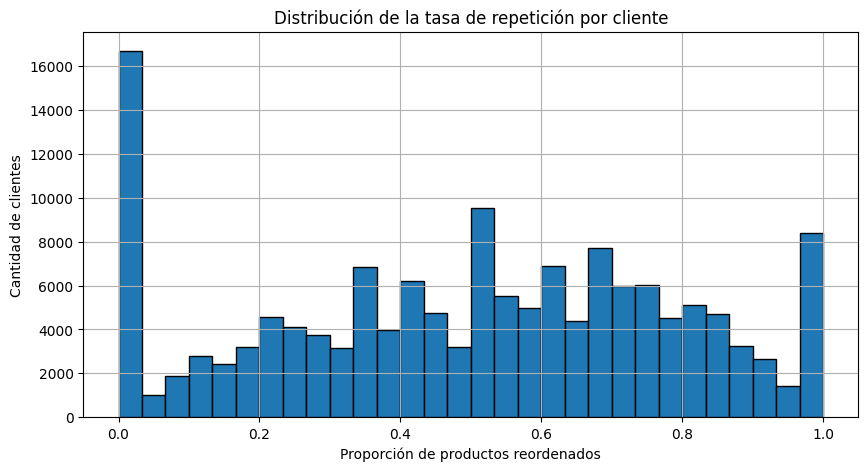

In [48]:
# Unir order_products con orders para obtener el user_id. 
order_products_users = order_products.merge(orders[['order_id', 'user_id']], on='order_id', how='left')

# Calcular la tasa de repetición por usuario
customer_reorder_rate = order_products_users.groupby('user_id')['reordered'].mean()

# Graficar la distribución de la tasa de repetición por cliente
plt.figure(figsize=(10, 5))
customer_reorder_rate.hist(bins=30, edgecolor='black')
plt.title("Distribución de la tasa de repetición por cliente")
plt.xlabel("Proporción de productos reordenados")
plt.ylabel("Cantidad de clientes")
plt.show()

La mayoría de los clientes repiten sus compras, mostrando hábitos consistentes. Algunos tienen tasas bajas, indicando exploración o compras ocasionales. Esto ayuda a personalizar estrategias de fidelización y recomendaciones.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [49]:
first_cart_products = order_products[order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20).reset_index()
first_cart_products.columns = ['product_id', 'first_count']
first_cart_products = first_cart_products.merge(products, on='product_id', how='left')

print("Top 20 productos añadidos primero al carrito:")
print(first_cart_products[['product_id', 'product_name', 'first_count']])

Top 20 productos añadidos primero al carrito:
    product_id                 product_name  first_count
0        24852                       Banana        15562
1        13176       Bag of Organic Bananas        11026
2        27845           Organic Whole Milk         4363
3        21137         Organic Strawberries         3946
4        47209         Organic Hass Avocado         3390
5        21903         Organic Baby Spinach         3336
6        47766              Organic Avocado         3044
7        19660                 Spring Water         2336
8        16797                 Strawberries         2308
9        27966          Organic Raspberries         2024
10       44632   Sparkling Water Grapefruit         1914
11       49235          Organic Half & Half         1797
12       47626                  Large Lemon         1737
13         196                         Soda         1733
14       38689     Organic Reduced Fat Milk         1397
15       26209                        Lime

Los productos que las personas añaden primero a sus carritos suelen ser esenciales y de consumo recurrente, como bananas, leche y aguacates, lo que indica su prioridad en la compra. Este comportamiento puede ser aprovechado para estrategias de marketing y promociones dirigidas a estos productos clave.

### Conclusion general del proyecto:

Patrones de Compra y Preferencias del Cliente.El análisis de datos de Instacart reveló que los clientes tienen hábitos de compra recurrentes, con una alta preferencia por productos frescos y orgánicos como bananas, fresas, aguacates y leche. La mayoría de los pedidos incluyen entre 5 y 20 productos, reflejando un comportamiento de compra frecuente pero en cantidades moderadas. Además, los productos más reordenados sugieren una fuerte fidelidad a ciertos artículos esenciales, lo que permite diseñar estrategias de marketing personalizadas y optimizar la gestión de inventario.

Optimización de la Plataforma y Estrategias de Venta. El análisis de los datos mostró que los clientes realizan la mayoría de sus pedidos entre las 9 a. m. y las 4 p. m., con un pico significativo los sábados y domingos. También se identificó que los artículos agregados primero al carrito suelen ser productos básicos, lo que sugiere que los usuarios priorizan estos elementos en sus compras. Estos hallazgos pueden ser utilizados para mejorar la experiencia de compra en la plataforma, optimizar la logística de entregas y desarrollar estrategias de fidelización, como descuentos en productos recurrentes y recomendaciones personalizadas basadas en patrones de compra.